In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn import metrics

In [2]:
df1 = pd.read_csv('Rose.csv')

In [3]:
df1.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [4]:
df1.dtypes

YearMonth     object
Rose         float64
dtype: object

## 2.1) Ans:

In [5]:
date1 = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M') 

In [6]:
date1

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [7]:
df1['Time_Stamp'] = pd.DataFrame(date1)

In [8]:
df1.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [9]:
df1.set_index(keys = 'Time_Stamp',drop=True,inplace=True)
df1.head()

,YearMonth,Rose
Time_Stamp,,
1980-01-31,1980-01,112.0
1980-02-29,1980-02,118.0
1980-03-31,1980-03,129.0
1980-04-30,1980-04,99.0
1980-05-31,1980-05,116.0


In [10]:
df1.drop(labels='YearMonth',inplace=True,axis=1)
df1.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [11]:
df1.shape

(187, 1)

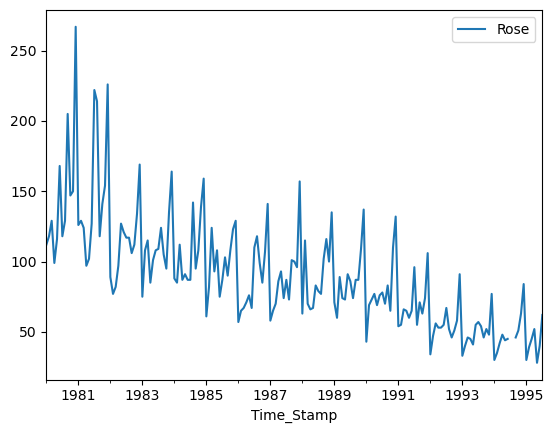

In [12]:
df1.plot()
plt.show()

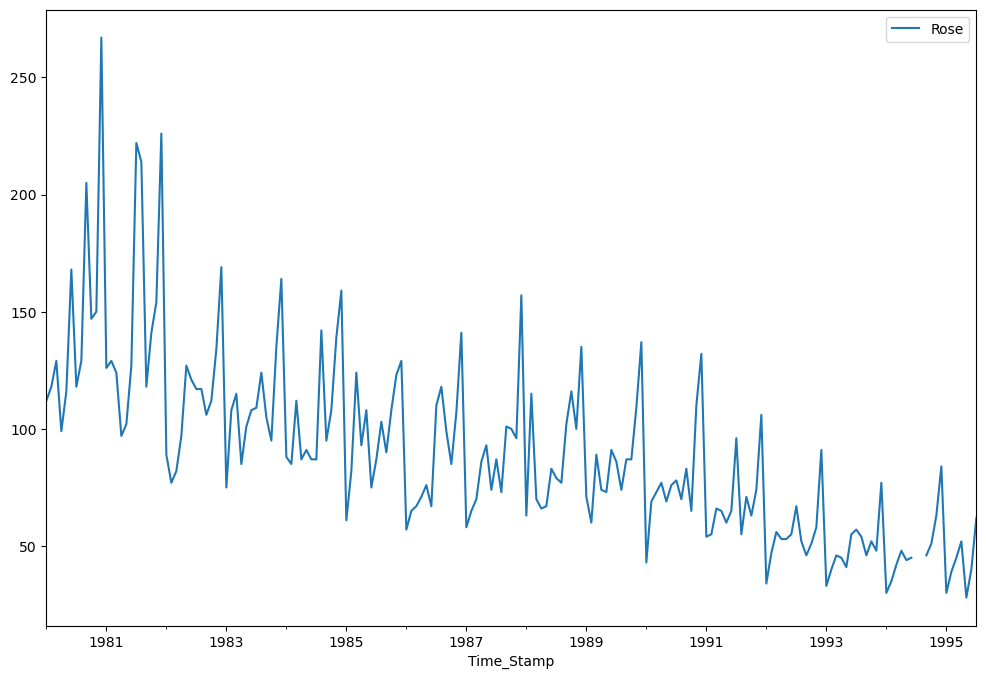

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df1.plot()
plt.show()

## 2.2) Ans:

In [14]:
## Checking for missing value
df1.isnull().sum()

Rose    2
dtype: int64

In [15]:
## Treating missing values
df1.interpolate(method='spline',order=1, inplace=True)

In [16]:
df1.isnull().sum()

Rose    0
dtype: int64

In [17]:
## EDA 

In [18]:
df1.describe()

,Rose
count,187.000000
mean,89.927152
std,39.224081
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


### Yearly BoxPlots

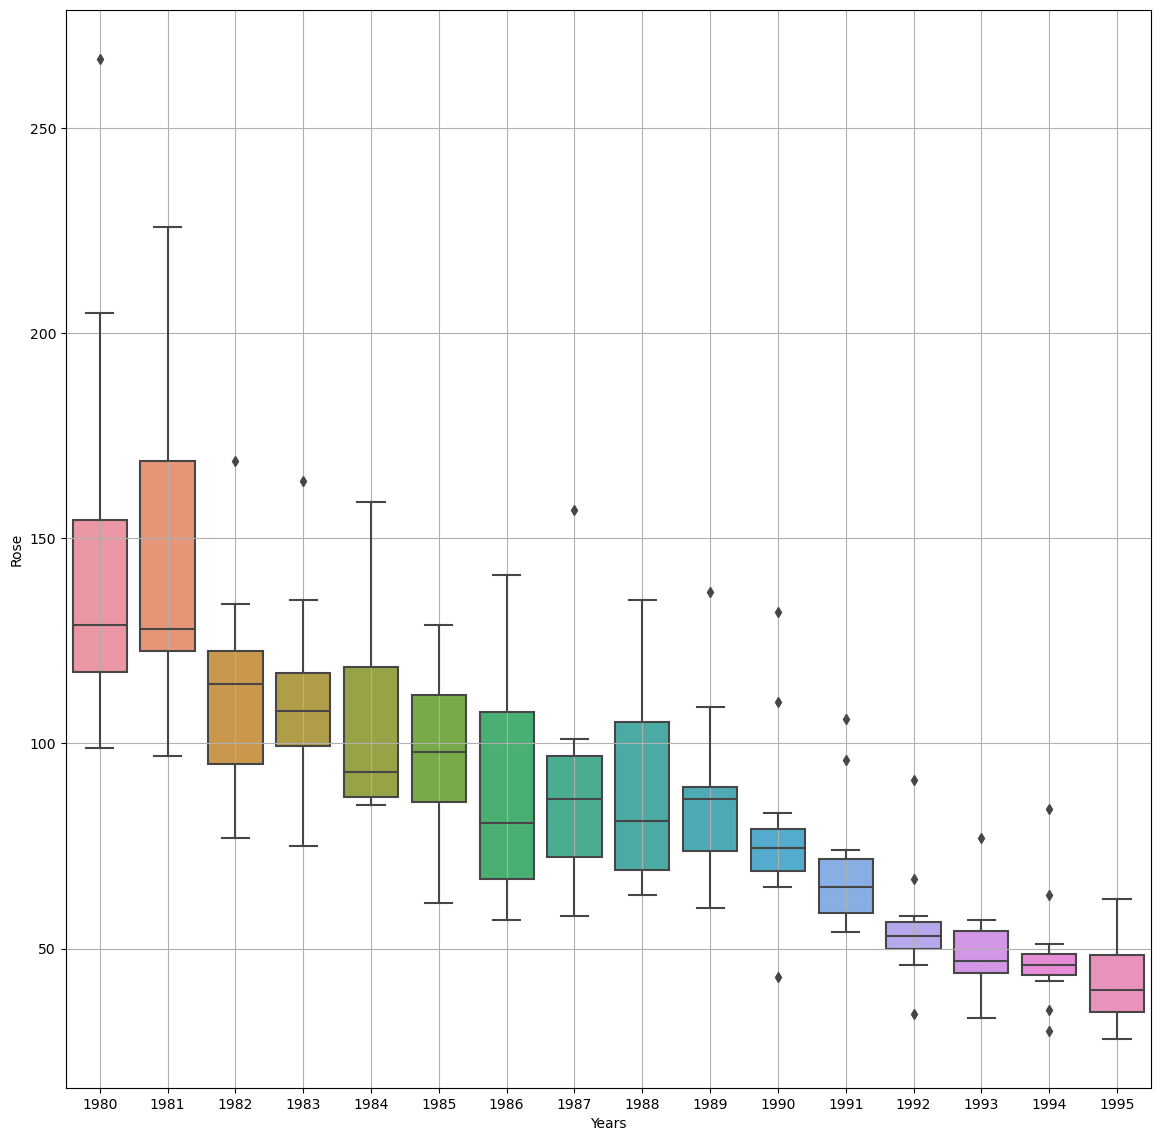

In [19]:
fig, ax = plt.subplots(figsize=(14,14))
sns.boxplot(x=df1.index.year, y=df1['Rose'], ax=ax, whis=1.5) 
plt.grid()
plt.xlabel('Years')
plt.ylabel('Rose');

### Monthly BoxPlots

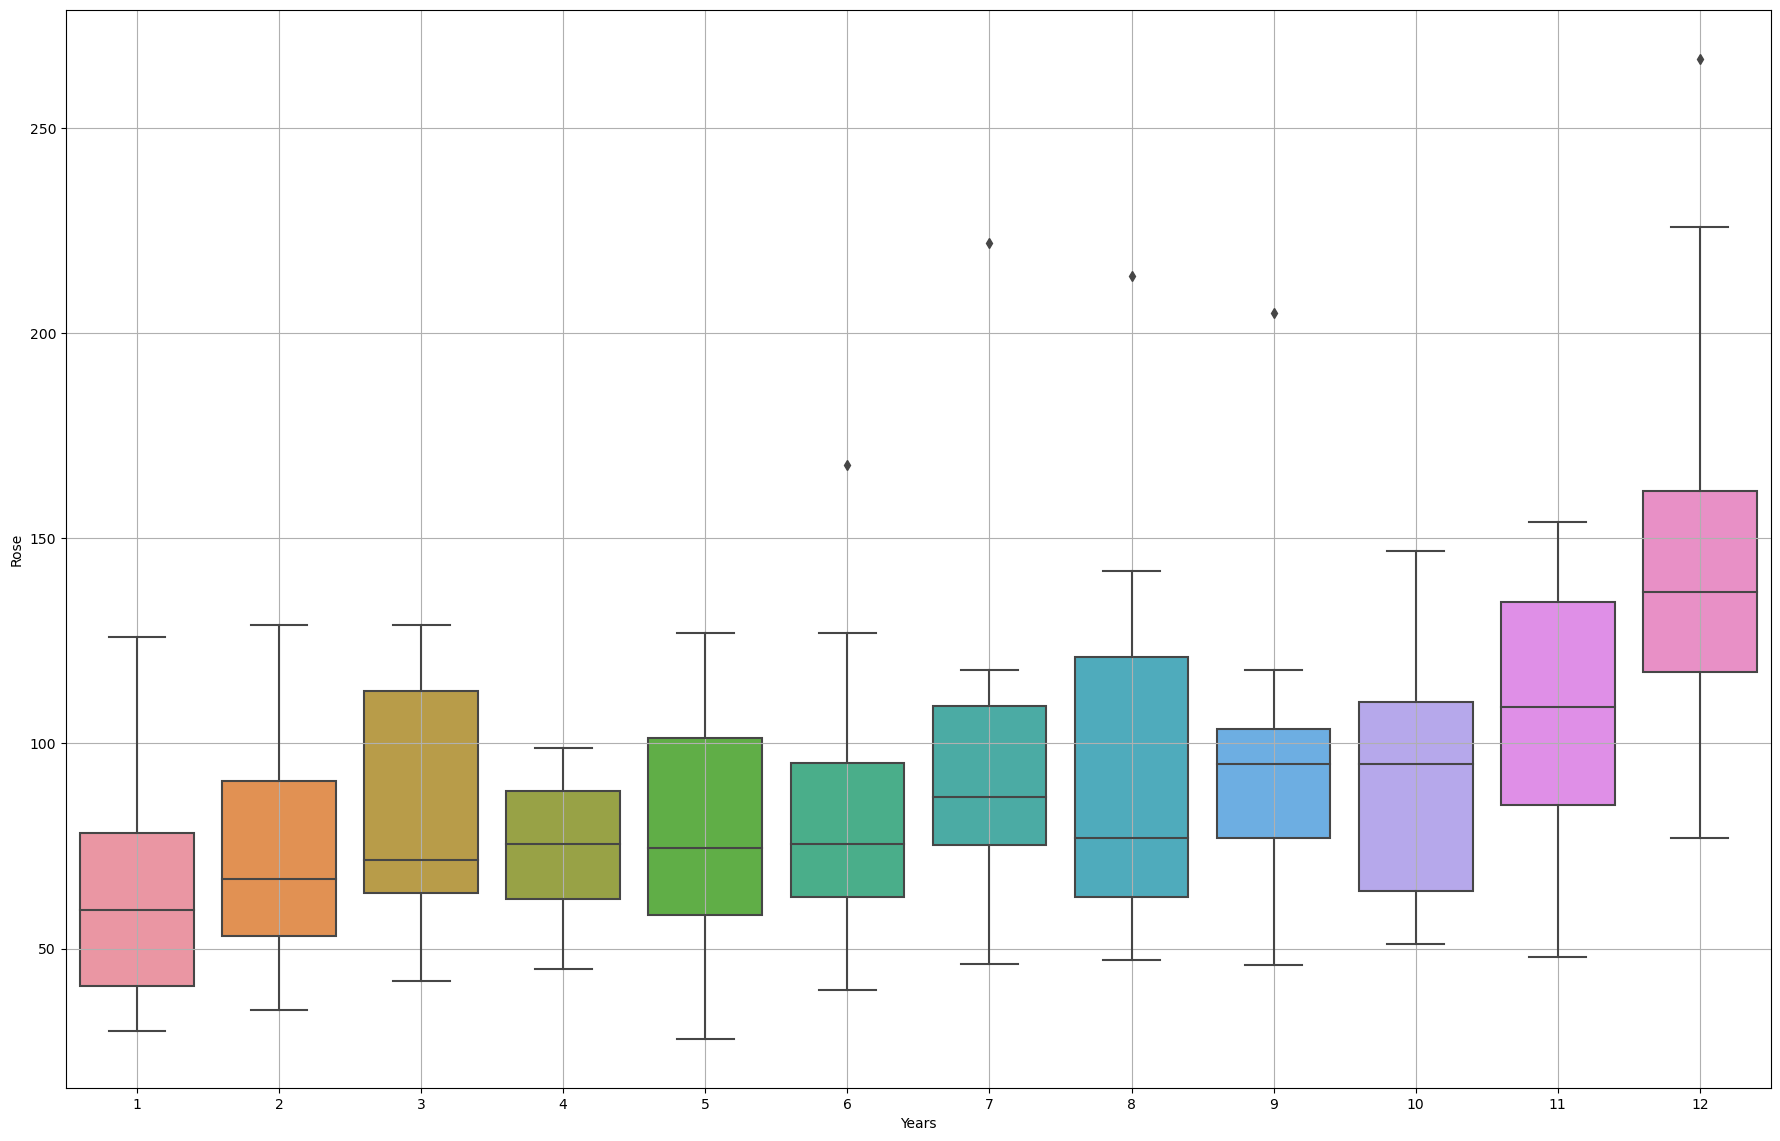

In [20]:
fig, ax = plt.subplots(figsize=(22,14))
sns.boxplot(x=df1.index.month, y=df1['Rose'], ax=ax, whis=1.5) 
plt.grid()
plt.xlabel('Years')
plt.ylabel('Rose');

### Monthplot of the given time series

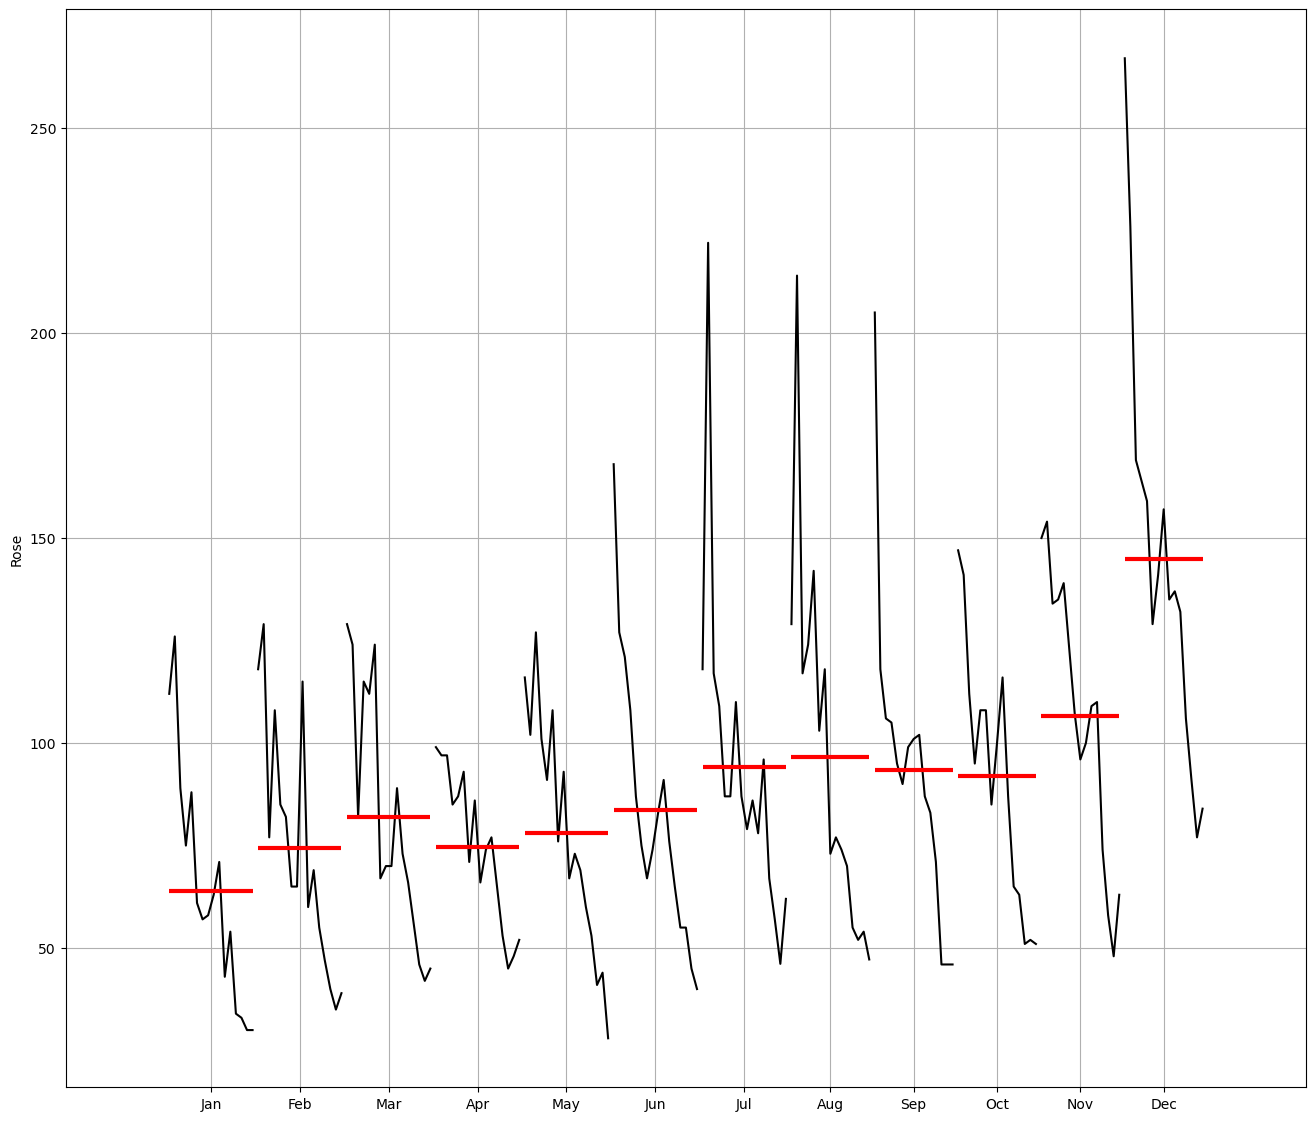

In [21]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(16,14))

month_plot(df1, ylabel='Rose',ax=ax)
plt.grid();

### Time Series according to different months for different years.

In [22]:
yearly_wine_sales_across_months = pd.pivot_table(df1, values = 'Rose', columns = df1.index.month, 
                                        index = df1.index.year)

yearly_wine_sales_across_months

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.000000,129.000000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.000000,214.000000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.000000,117.000000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.000000,124.000000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.000000,142.000000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.000000,103.000000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.000000,118.000000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.000000,73.000000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.000000,77.000000,102.0,116.0,100.0,135.0


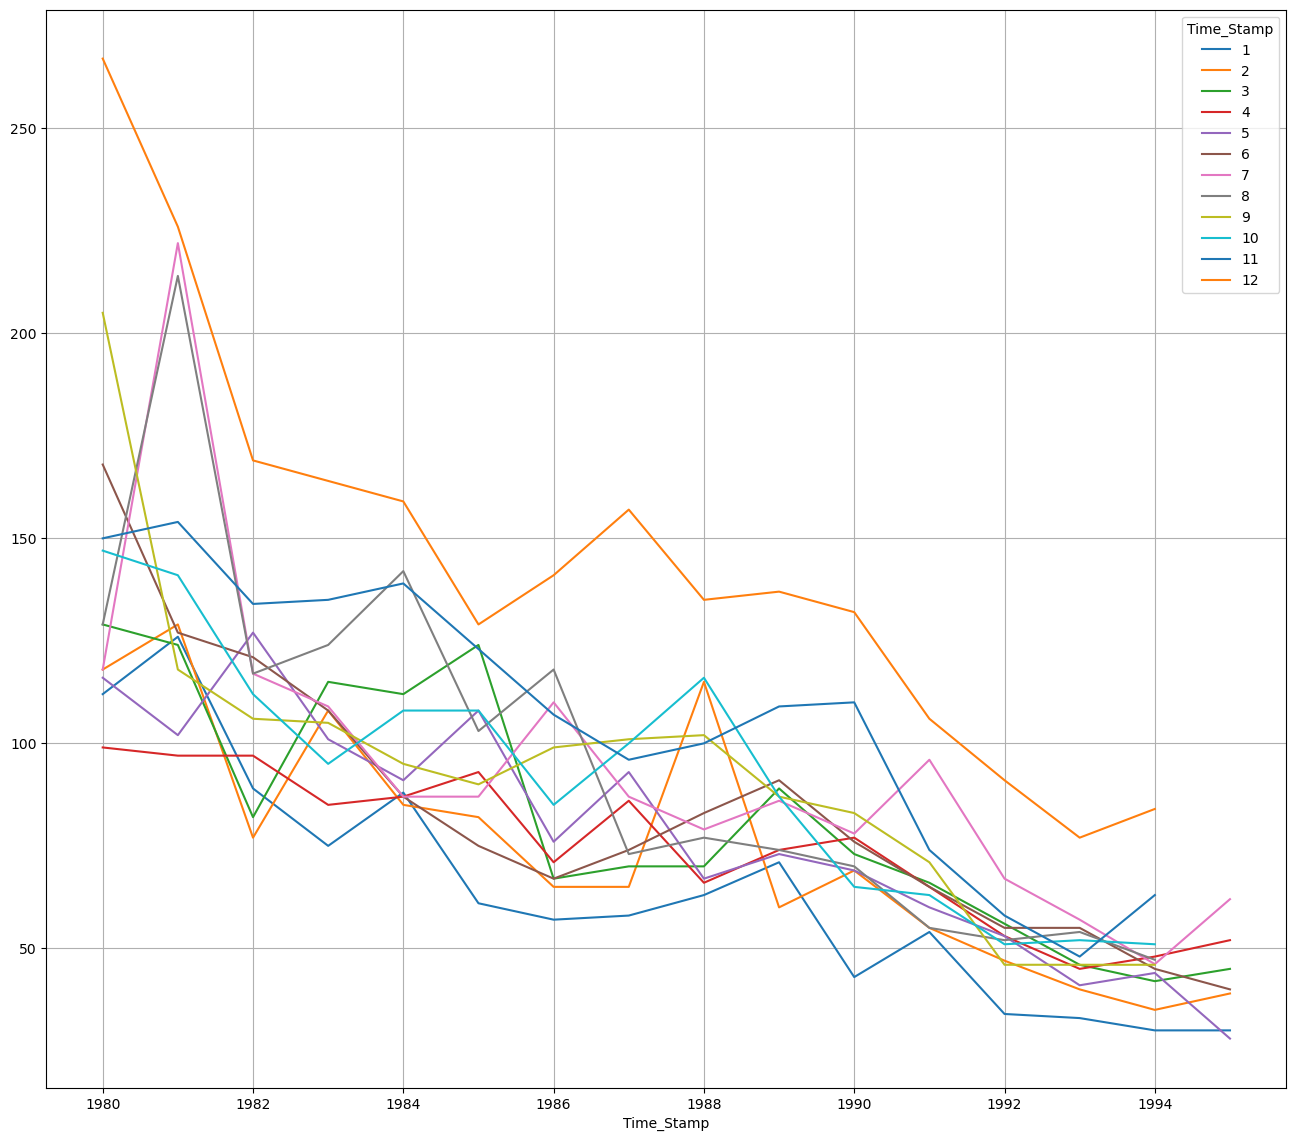

In [23]:
fig, ax = plt.subplots(figsize=(16,14))
yearly_wine_sales_across_months.plot(ax=ax)
plt.grid();

### Decomposition

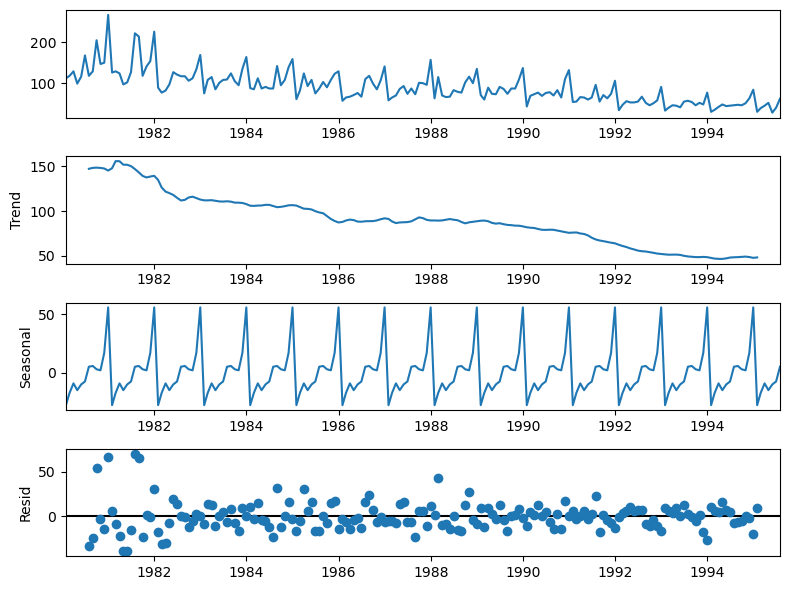

In [24]:
rcParams['figure.figsize'] =8,6
decomposition_add = seasonal_decompose(df1,model='additive', period =12)
decomposition_add.plot();

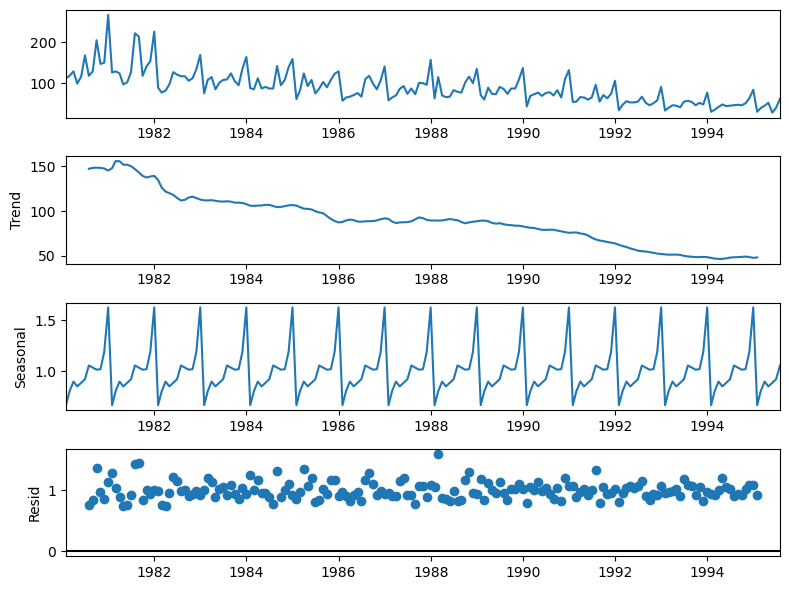

In [25]:
decomposition_mul = seasonal_decompose(df1,model='multiplicative')
decomposition_mul.plot();

In [26]:
trend = decomposition_mul.trend
seasonality = decomposition_mul.seasonal
residual = decomposition_mul.resid

print('Trend','\n',trend.round(2).head(12),'\n')
print('Seasonality','\n',seasonality.round(2).head(12),'\n')
print('Residual','\n',residual.round(2).head(12),'\n')

Trend 
 Time_Stamp
1980-01-31       NaN
1980-02-29       NaN
1980-03-31       NaN
1980-04-30       NaN
1980-05-31       NaN
1980-06-30       NaN
1980-07-31    147.08
1980-08-31    148.12
1980-09-30    148.37
1980-10-31    148.08
1980-11-30    147.42
1980-12-31    145.12
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.67
1980-02-29    0.81
1980-03-31    0.90
1980-04-30    0.85
1980-05-31    0.89
1980-06-30    0.92
1980-07-31    1.06
1980-08-31    1.04
1980-09-30    1.02
1980-10-31    1.02
1980-11-30    1.19
1980-12-31    1.63
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31     NaN
1980-02-29     NaN
1980-03-31     NaN
1980-04-30     NaN
1980-05-31     NaN
1980-06-30     NaN
1980-07-31    0.76
1980-08-31    0.84
1980-09-30    1.36
1980-10-31    0.97
1980-11-30    0.85
1980-12-31    1.13
Name: resid, dtype: float64 



## 2.3) Ans:

In [27]:
### Split a data into Train and Test

train = df1[df1.index.year < 1991] 
test = df1[df1.index.year >= 1991]

In [28]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


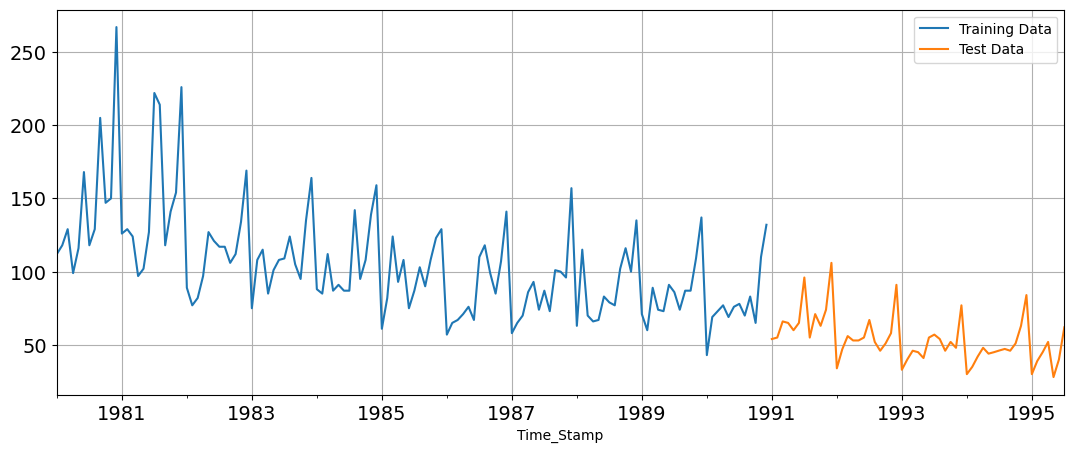

In [29]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## 2.4) Ans:

### Model 1: Linear Regression

In [30]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [31]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [32]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

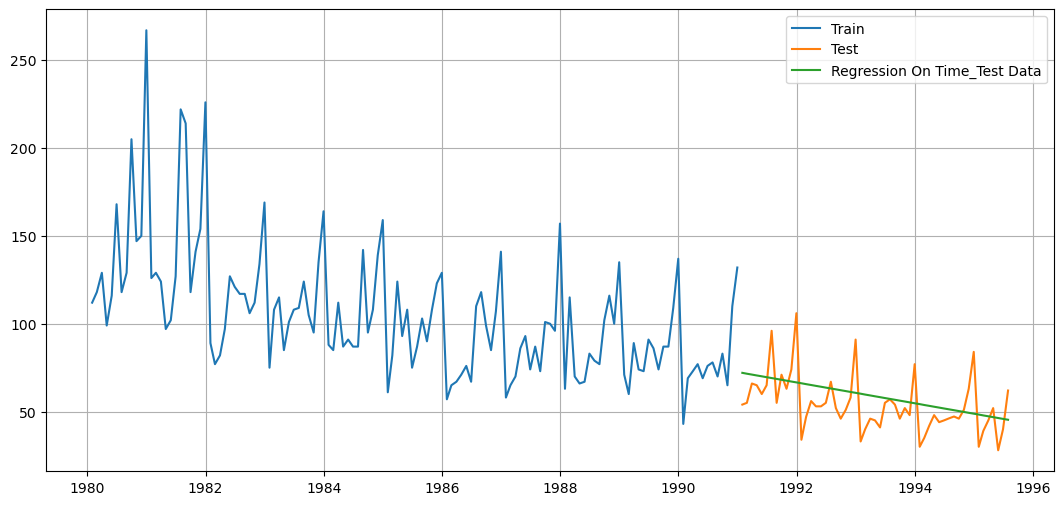

In [36]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [37]:
### Model Evaluation
# Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.26


In [38]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,15.255435


In [39]:
results_final=resultsDf.copy()

### Model 2: Naive Forecast

In [40]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [41]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

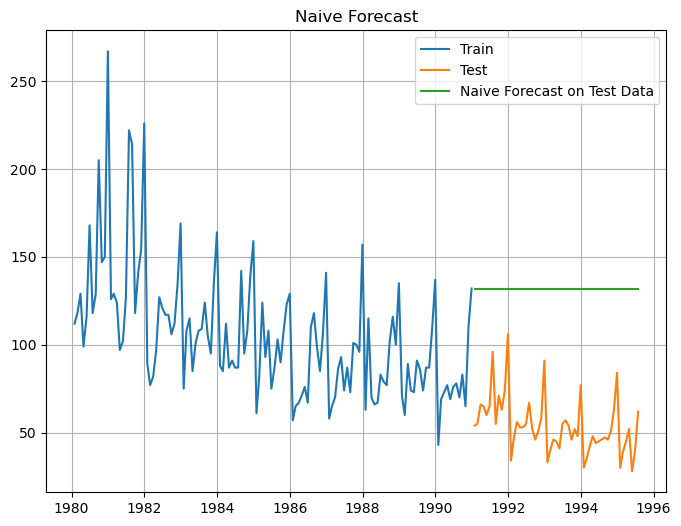

In [42]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [43]:
### Model Evaluation
# Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.672


In [44]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])
resultsDf_2

,Test RMSE
NaiveModel,79.672238


In [45]:
results_final=pd.concat([results_final,resultsDf_2])
results_final

,Test RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238


### Model 3: Simple Average

In [46]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [47]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Time_Stamp,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


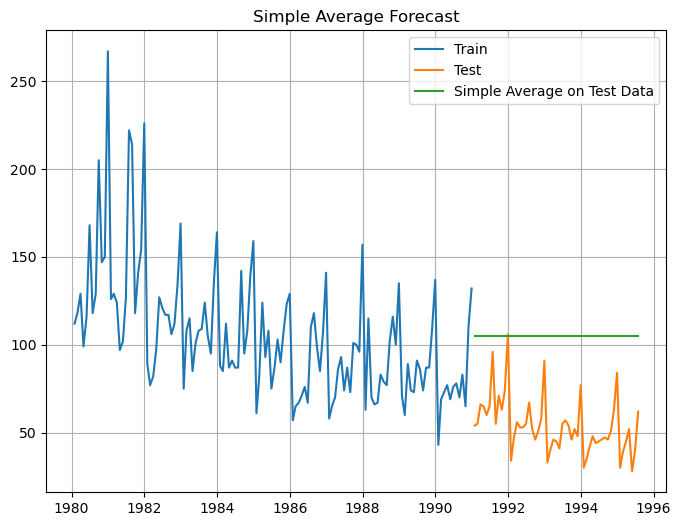

In [48]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [49]:
### Model Evaluation
# Test Data - RMSE

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.413


In [50]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])
resultsDf_3

,Test RMSE
SimpleAverageModel,53.413057


In [51]:
results_final=pd.concat([results_final,resultsDf_3])
results_final

,Test RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238
SimpleAverageModel,53.413057


### Model 4: Simple Exponential Smoothing

In [52]:
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display

In [53]:
SES_train = train.copy()
SES_test = test.copy()

In [54]:
model_SES = SimpleExpSmoothing(SES_train['Rose'], initialization_method='estimated')

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [55]:
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params

{'smoothing_level': 0.09874933517484011,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38703609891138,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [56]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Rose,predict
Time_Stamp,,
1991-01-31,54.0,87.104984
1991-02-28,55.0,87.104984
1991-03-31,66.0,87.104984
1991-04-30,65.0,87.104984
1991-05-31,60.0,87.104984


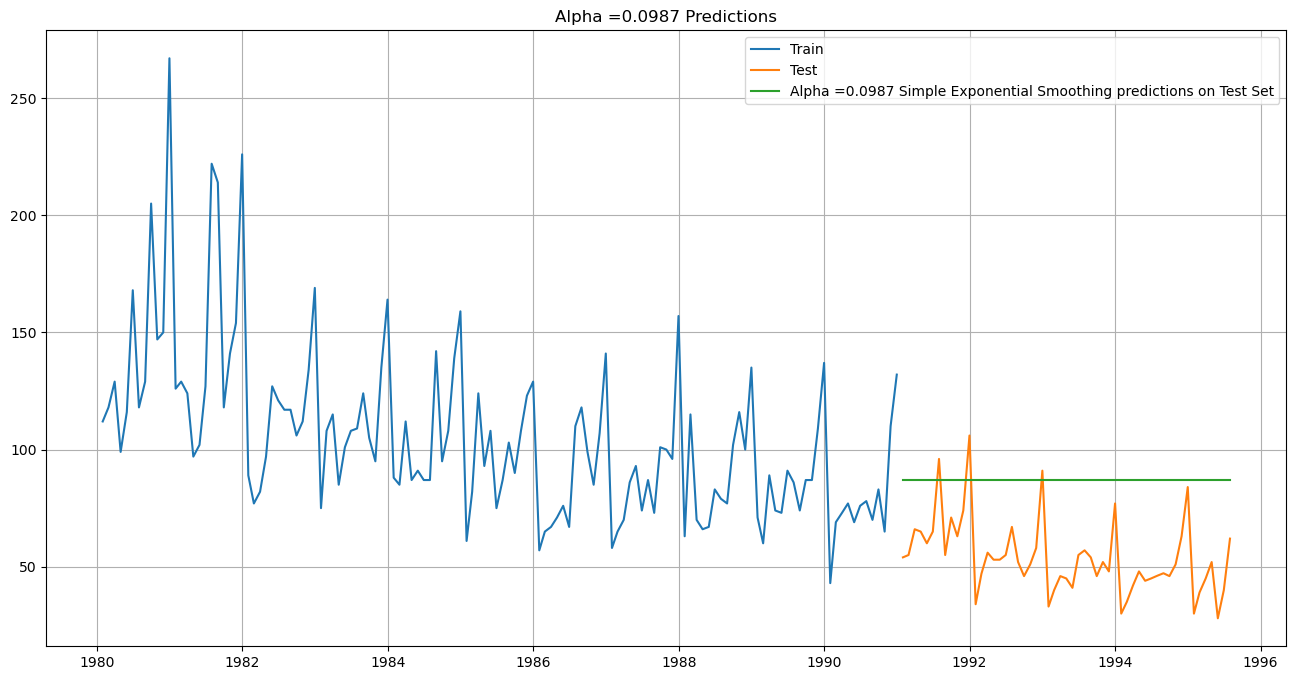

In [57]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0987 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0987 Predictions');

In [58]:
### Model Evaluation
# Test Data - RMSE

rmse_model4_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha = 0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model4_test_1))

For Alpha = 0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.748


In [59]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_1]},index=['Alpha=0.0987,SimpleExponentialSmoothing'])
resultsDf_4

,Test RMSE
"Alpha=0.0987,SimpleExponentialSmoothing",36.748147


In [60]:
results_final=pd.concat([results_final,resultsDf_4])
results_final

,Test RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238
SimpleAverageModel,53.413057
"Alpha=0.0987,SimpleExponentialSmoothing",36.748147


In [61]:
resultsDf_5 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_5

,Alpha Values,Train RMSE,Test RMSE


In [62]:
for i in np.arange(0.05,0.15,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model4_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_model4_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)

    resultsDf_5 = resultsDf_5.append({'Alpha Values':i,'Train RMSE':rmse_model4_train_i 
                                      ,'Test RMSE':rmse_model4_test_i}, ignore_index=True)

In [63]:
resultsDf_5.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
2,0.07,32.649443,36.386920
3,0.08,32.477045,36.414697
1,0.06,32.880735,36.529229
4,0.09,32.348486,36.555993
5,0.10,32.253385,36.779942
0,0.05,33.193280,36.950571
6,0.11,32.184370,37.068336
7,0.12,32.136060,37.409385
8,0.13,32.104416,37.794737
9,0.14,32.086343,38.218014


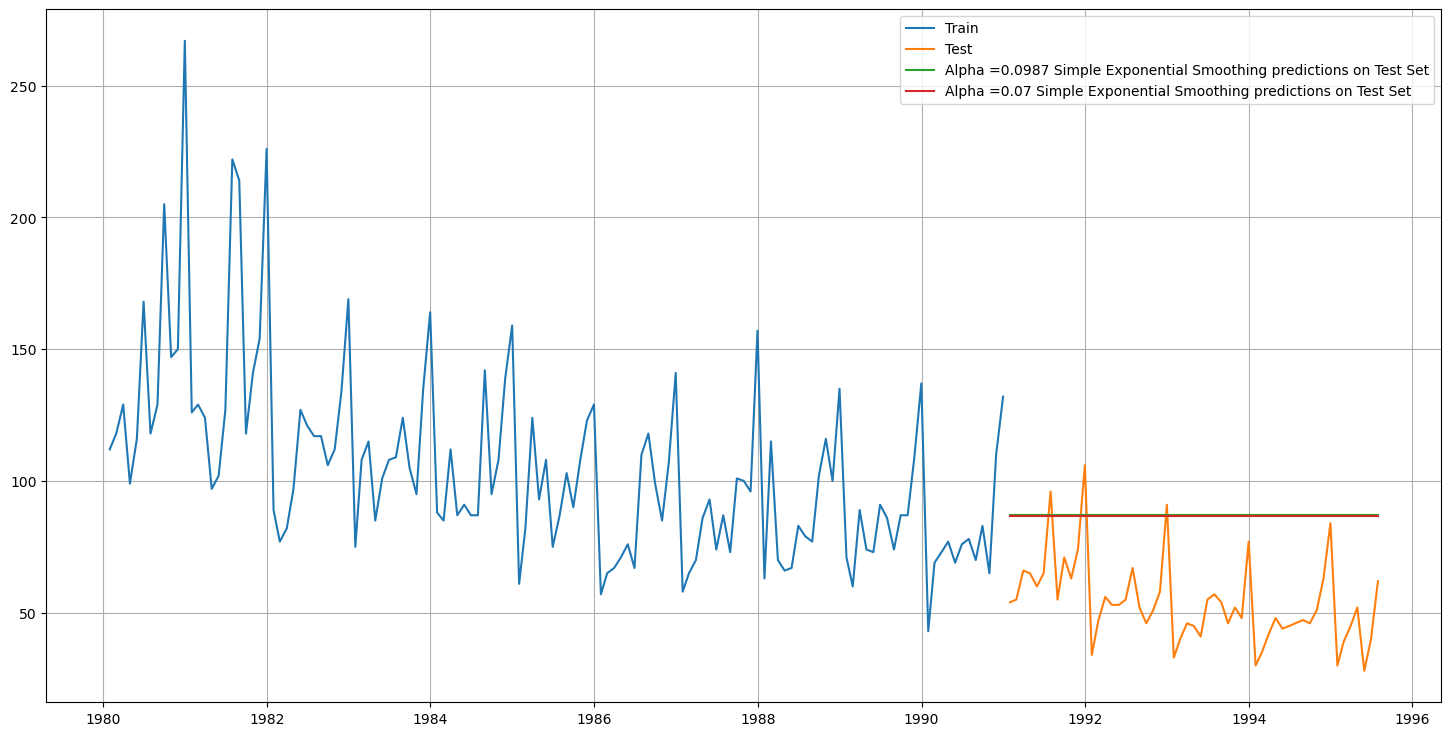

In [64]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0987 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.07], label='Alpha =0.07 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [65]:
resultsDf_5_1 = pd.DataFrame({'Test RMSE': [resultsDf_5.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.07,SimpleExponentialSmoothing (based on range)'])
resultsDf_5_1

,Test RMSE
"Alpha=0.07,SimpleExponentialSmoothing (based on range)",36.38692


In [66]:
results_final=pd.concat([results_final,resultsDf_5_1])
results_final

,Test RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238
SimpleAverageModel,53.413057
"Alpha=0.0987,SimpleExponentialSmoothing",36.748147
"Alpha=0.07,SimpleExponentialSmoothing (based on range)",36.386920


### Model 5: Double Exponential Smoothing

In [67]:
DES_train = train.copy()
DES_test = test.copy()

In [68]:
model_DES = Holt(DES_train['Rose'], initialization_method='estimated')

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [69]:
model_DES_autofit = model_DES.fit(optimized=True)
model_DES_autofit.params

{'smoothing_level': 1.9086427682180844e-08,
 'smoothing_trend': 7.302464353829351e-09,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.81629861505857,
 'initial_trend': -0.4943753249082896,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [70]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

,Rose,predict
Time_Stamp,,
1991-01-31,54.0,72.064380
1991-02-28,55.0,71.570005
1991-03-31,66.0,71.075630
1991-04-30,65.0,70.581254
1991-05-31,60.0,70.086879


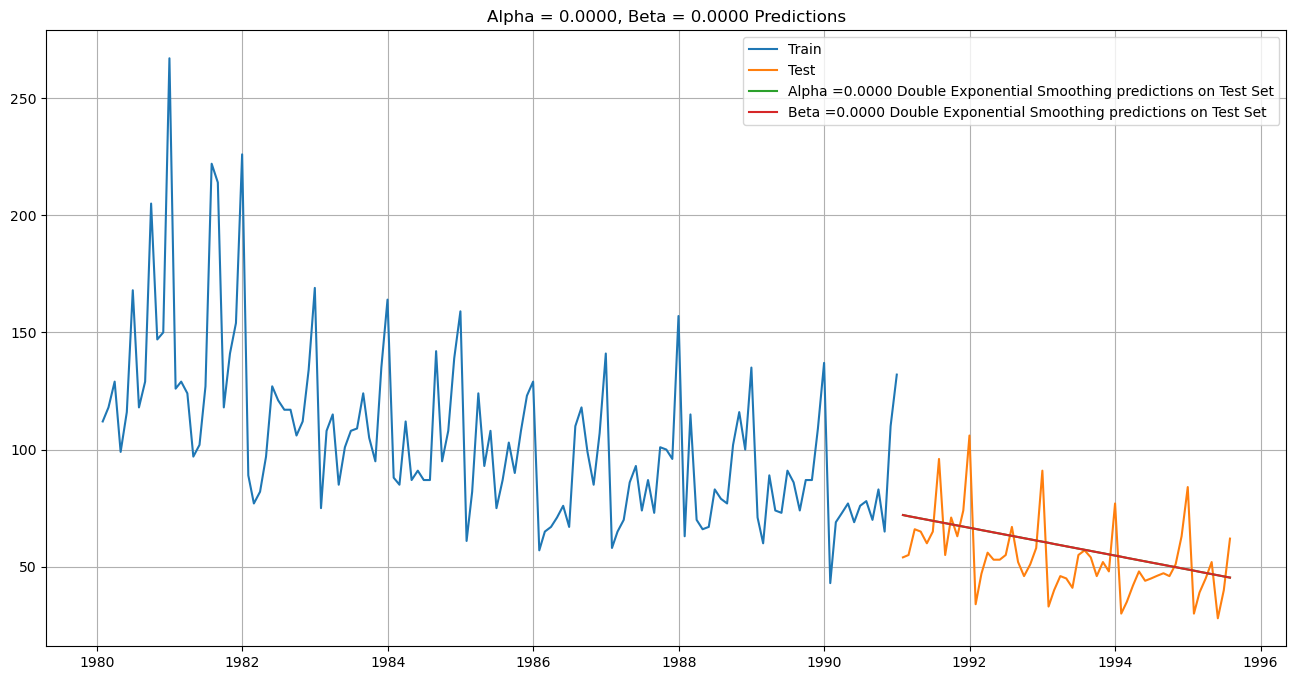

In [71]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict'], label='Alpha =0.0000 Double Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict'], label='Beta =0.0000 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.0000, Beta = 0.0000 Predictions');

In [72]:
### Model Evaluation
# Test Data - RMSE

rmse_model5_test_1 = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict'],squared=False)
print("For Alpha = 0.0000, Beta = 0.0000, Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha = 0.0000, Beta = 0.0000, Double Exponential Smoothing Model forecast on the Test Data, RMSE is 15.256


In [73]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.0000, Beta = 0.0000, DoubleExponentialSmoothing'])
resultsDf_6

,Test RMSE
"Alpha=0.0000, Beta = 0.0000, DoubleExponentialSmoothing",15.255805


In [74]:
results_final=pd.concat([results_final,resultsDf_6])
results_final

,Test RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238
SimpleAverageModel,53.413057
"Alpha=0.0987,SimpleExponentialSmoothing",36.748147
"Alpha=0.07,SimpleExponentialSmoothing (based on range)",36.386920
"Alpha=0.0000, Beta = 0.0000, DoubleExponentialSmoothing",15.255805


In [75]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [76]:
for i in np.arange(0.1,0.5,0.1):
    for j in np.arange(0.1,0.5,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [77]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,35.120545,36.829902
1,0.1,0.2,33.990798,48.580783
2,0.1,0.3,33.518388,78.069793
3,0.1,0.4,33.495355,99.600077
4,0.2,0.1,33.274844,65.677542
5,0.2,0.2,33.675422,113.977432
6,0.2,0.3,34.531495,170.940208
7,0.2,0.4,35.661562,234.402721
8,0.3,0.1,33.673813,98.598039
9,0.3,0.2,34.659055,177.083222


In [78]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,35.120545,36.829902
1,0.1,0.2,33.990798,48.580783
4,0.2,0.1,33.274844,65.677542
2,0.1,0.3,33.518388,78.069793
8,0.3,0.1,33.673813,98.598039


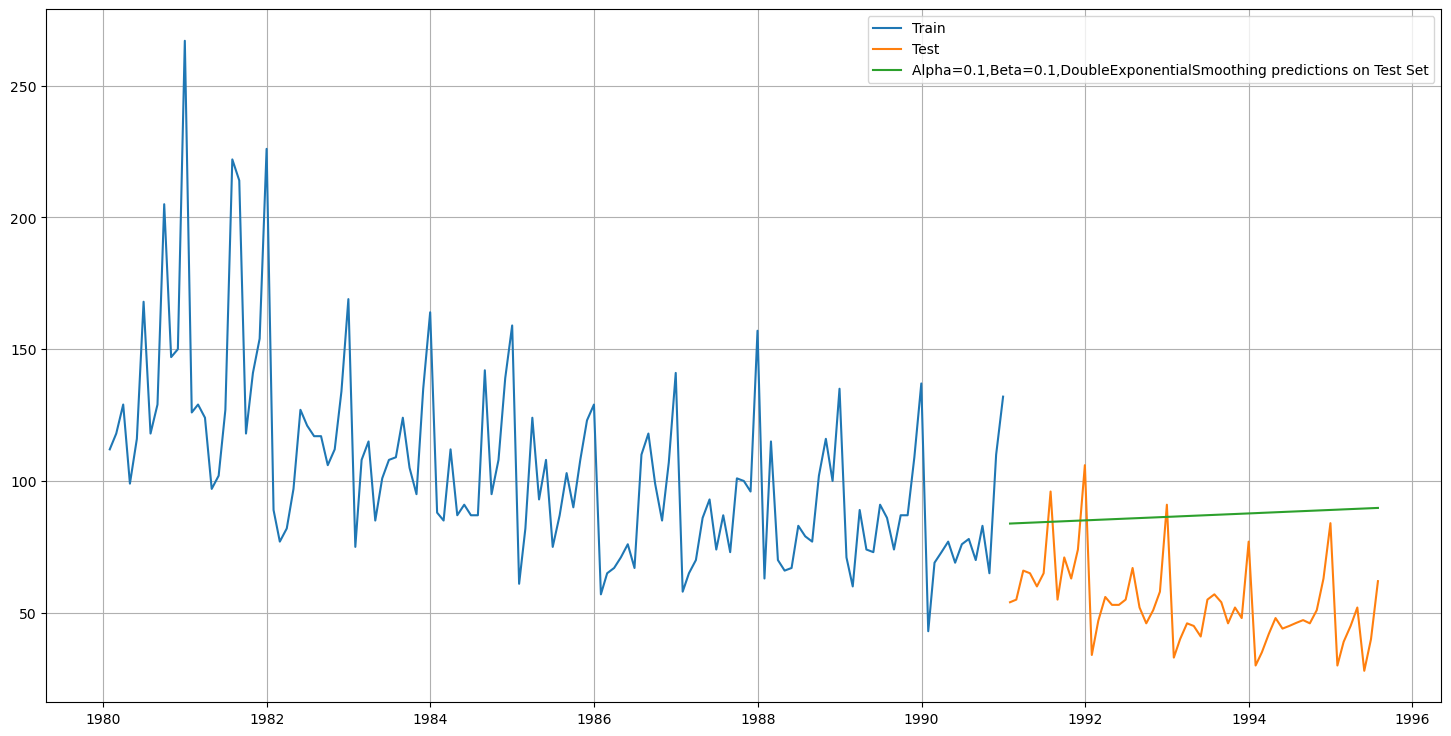

In [79]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [80]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1, Beta=0.1,DoubleExponentialSmoothing (based on range)'])
resultsDf_7_1

,Test RMSE
"Alpha=0.1, Beta=0.1,DoubleExponentialSmoothing (based on range)",36.829902


In [81]:
results_final=pd.concat([results_final,resultsDf_7_1])
results_final

,Test RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238
SimpleAverageModel,53.413057
"Alpha=0.0987,SimpleExponentialSmoothing",36.748147
"Alpha=0.07,SimpleExponentialSmoothing (based on range)",36.386920
"Alpha=0.0000, Beta = 0.0000, DoubleExponentialSmoothing",15.255805
"Alpha=0.1, Beta=0.1,DoubleExponentialSmoothing (based on range)",36.829902


### Model 6: Triple Exponential Smoothing

In [82]:
TES_train = train.copy()
TES_test = test.copy()

In [83]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='multiplicative',seasonal='additive',freq='M')

In [84]:
model_TES_autofit = model_TES.fit()

In [85]:
model_TES_autofit.params

{'smoothing_level': 0.04392379552557389,
 'smoothing_trend': 2.2382727020656378e-05,
 'smoothing_seasonal': 0.0005301252122432588,
 'damping_trend': nan,
 'initial_level': 141.25278376466085,
 'initial_trend': 0.993889634188071,
 'initial_seasons': array([-22.44377304, -10.02696656,  -1.98981311, -12.58528373,
         -3.74636822,   1.74412094,  11.67398645,  17.78894186,
         13.81217532,  11.92521254,  30.01867872,  72.29048742]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [86]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,auto_predict
Time_Stamp,,
1991-01-31,54.0,43.085644
1991-02-28,55.0,55.102106
1991-03-31,66.0,62.741356
1991-04-30,65.0,51.750473
1991-05-31,60.0,60.196334


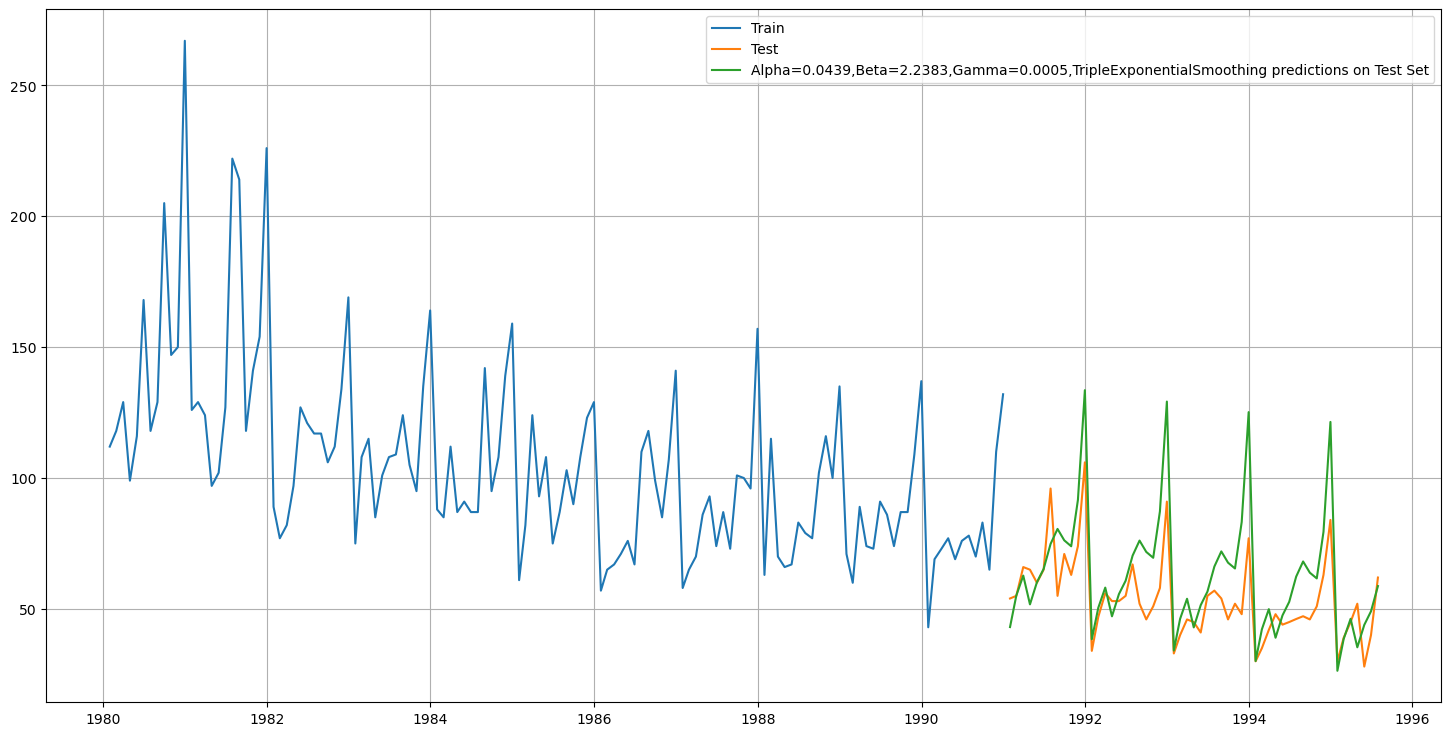

In [87]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.0439,Beta=2.2383,Gamma=0.0005,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [88]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.0439,Beta=2.2383,Gamma=0.0005, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.0439,Beta=2.2383,Gamma=0.0005, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 16.625


In [89]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.0439,Beta=2.2383,Gamma=0.0005,TripleExponentialSmoothing'])

resultsDf_8_1

,Test RMSE
"Alpha=0.0439,Beta=2.2383,Gamma=0.0005,TripleExponentialSmoothing",16.624778


In [90]:
results_final=pd.concat([results_final,resultsDf_8_1])
results_final

,Test RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238
SimpleAverageModel,53.413057
"Alpha=0.0987,SimpleExponentialSmoothing",36.748147
"Alpha=0.07,SimpleExponentialSmoothing (based on range)",36.386920
"Alpha=0.0000, Beta = 0.0000, DoubleExponentialSmoothing",15.255805
"Alpha=0.1, Beta=0.1,DoubleExponentialSmoothing (based on range)",36.829902
"Alpha=0.0439,Beta=2.2383,Gamma=0.0005,TripleExponentialSmoothing",16.624778


In [91]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [92]:
for i in np.arange(0.01,0.06,0.01):
    for j in np.arange(0.5,2.5,0.5):
        for k in np.arange(0.0001,0.0006,0.0001):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [93]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.01,0.5,0.0001,25.108128,22.941792
1,0.01,0.5,0.0002,25.106429,22.935567
2,0.01,0.5,0.0003,25.104731,22.929346
3,0.01,0.5,0.0004,25.103033,22.923130
4,0.01,0.5,0.0005,25.101337,22.916919
...,...,...,...,...,...
95,0.05,2.0,0.0001,25.249351,40.832442
96,0.05,2.0,0.0002,25.248634,40.818943
97,0.05,2.0,0.0003,25.247919,40.805429
98,0.05,2.0,0.0004,25.247204,40.791901


In [94]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
84,0.05,0.5,0.0005,22.600461,18.714411
83,0.05,0.5,0.0004,22.601310,18.721901
82,0.05,0.5,0.0003,22.602160,18.729397
81,0.05,0.5,0.0002,22.603010,18.736899
80,0.05,0.5,0.0001,22.603861,18.744408


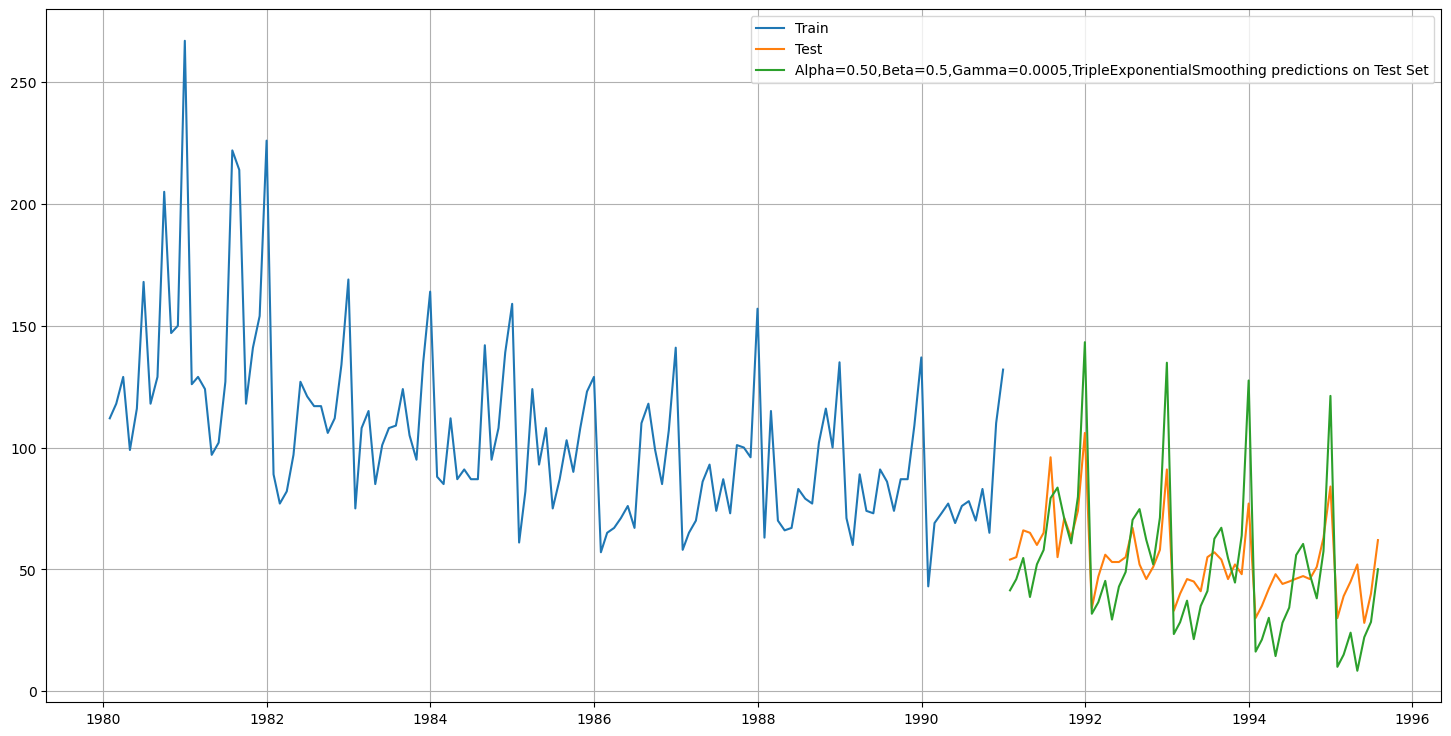

In [95]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['predict', 0.05, 0.5, 0.0005], label='Alpha=0.50,Beta=0.5,Gamma=0.0005,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [96]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.05,Beta=0.5,Gamma=0.0005,TripleExponentialSmoothing (based on range)'])

resultsDf_8_3

,Test RMSE
"Alpha=0.05,Beta=0.5,Gamma=0.0005,TripleExponentialSmoothing (based on range)",18.714411


In [97]:
results_final=pd.concat([results_final,resultsDf_8_3])
results_final

,Test RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238
SimpleAverageModel,53.413057
"Alpha=0.0987,SimpleExponentialSmoothing",36.748147
"Alpha=0.07,SimpleExponentialSmoothing (based on range)",36.386920
"Alpha=0.0000, Beta = 0.0000, DoubleExponentialSmoothing",15.255805
"Alpha=0.1, Beta=0.1,DoubleExponentialSmoothing (based on range)",36.829902
"Alpha=0.0439,Beta=2.2383,Gamma=0.0005,TripleExponentialSmoothing",16.624778
"Alpha=0.05,Beta=0.5,Gamma=0.0005,TripleExponentialSmoothing (based on range)",18.714411


## 2.5) Ans:

In [98]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

In [99]:
dftest = adfuller(train['Rose'])
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -2.164
DF test p-value is 0.2195


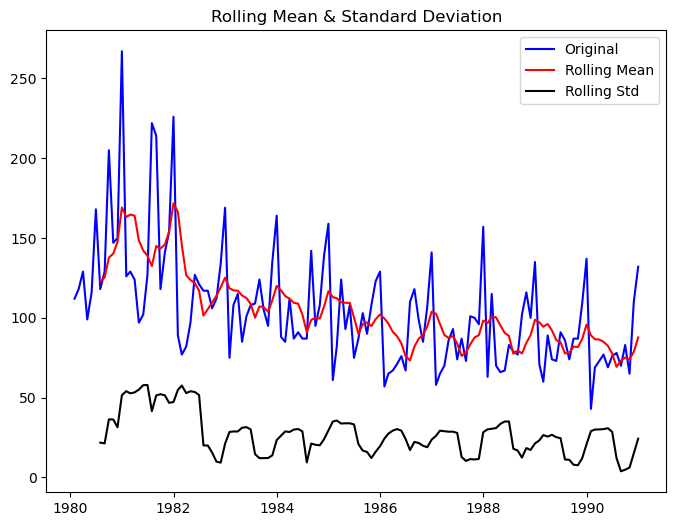

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [100]:
test_stationarity(train['Rose'])

**1st difference (d=1)**

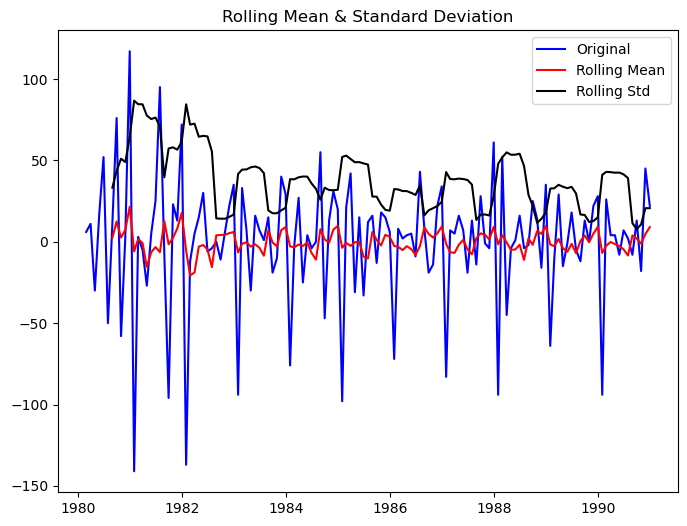

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [101]:
test_stationarity(train['Rose'].diff().dropna())

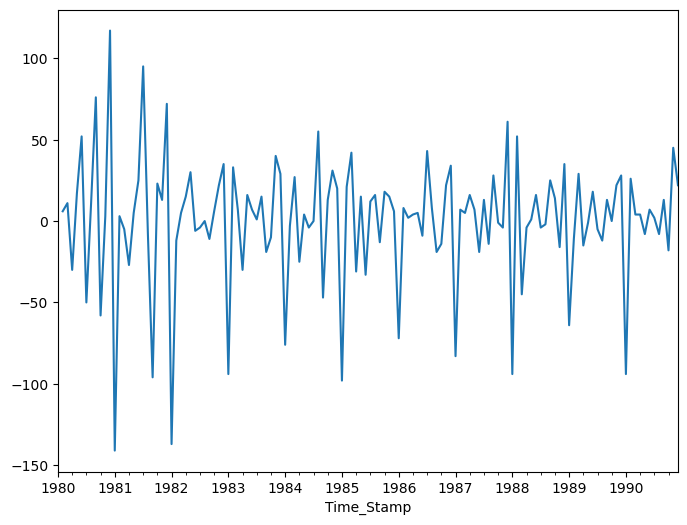

In [102]:
test_stationarity_diff = (train['Rose']).diff()
test_stationarity_diff.plot();

**log 10**

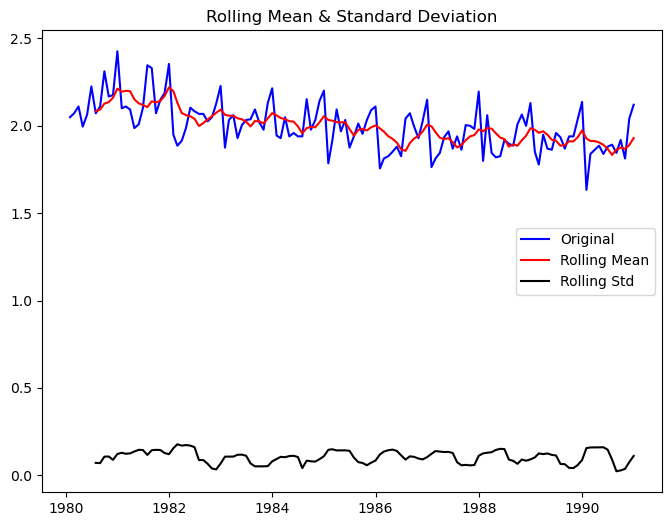

Results of Dickey-Fuller Test:
Test Statistic                  -1.535083
p-value                          0.516091
#Lags Used                      11.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
Critical Value (5%)             -2.885943
Critical Value (10%)            -2.579785
dtype: float64 



In [103]:
test_stationarity(np.log10(train['Rose']))

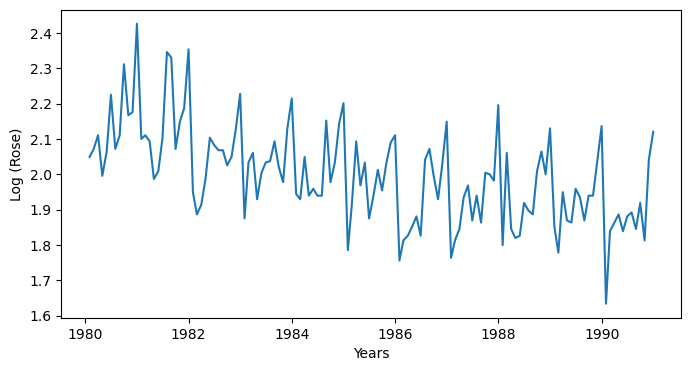

In [104]:
plt.figure(figsize=(8, 4))
plt.plot(np.log10(train['Rose']))
plt.xlabel('Years')
plt.ylabel('Log (Rose)');

**log 10 - 1st difference (d=1)**

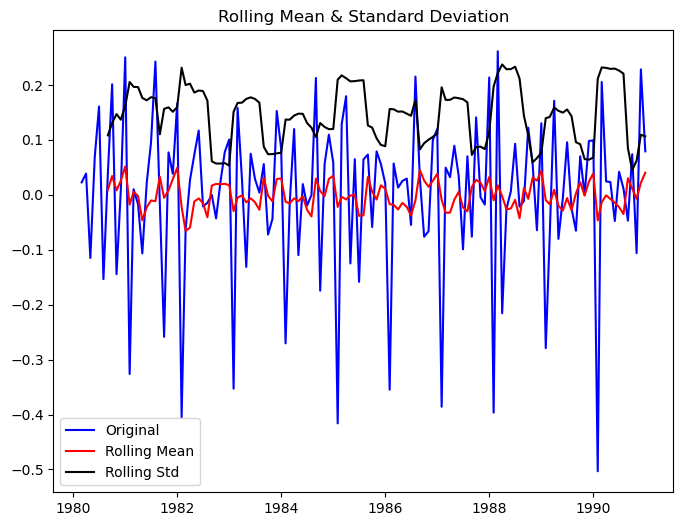

Results of Dickey-Fuller Test:
Test Statistic                -1.223741e+01
p-value                        1.020662e-22
#Lags Used                     1.000000e+01
Number of Observations Used    1.200000e+02
Critical Value (1%)           -3.486056e+00
Critical Value (5%)           -2.885943e+00
Critical Value (10%)          -2.579785e+00
dtype: float64 



In [105]:
test_stationarity(np.log10(train['Rose']).diff().dropna())

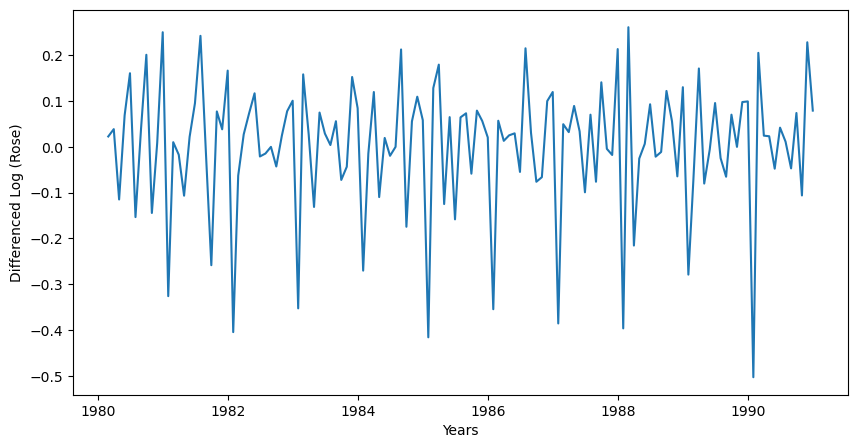

In [106]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(train['Rose']).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Rose)');

## 2.6) Ans:

## ARIMA model automated version

In [107]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [108]:
# Creating a Dataframe 
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [109]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748315
ARIMA(0, 1, 2) - AIC:1279.6715288535752
ARIMA(1, 1, 0) - AIC:1317.3503105381526
ARIMA(1, 1, 1) - AIC:1280.5742295380076
ARIMA(1, 1, 2) - AIC:1279.8707234231915
ARIMA(2, 1, 0) - AIC:1298.6110341604908
ARIMA(2, 1, 1) - AIC:1281.507862186858
ARIMA(2, 1, 2) - AIC:1281.8707222264168


In [110]:
## Sort the above AIC values in the ascending order

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1279.671529
5,"(1, 1, 2)",1279.870723
4,"(1, 1, 1)",1280.574230
7,"(2, 1, 1)",1281.507862
8,"(2, 1, 2)",1281.870722
1,"(0, 1, 1)",1282.309832
6,"(2, 1, 0)",1298.611034
3,"(1, 1, 0)",1317.350311
0,"(0, 1, 0)",1333.154673


In [111]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Sat, 16 Dec 2023   AIC                           1279.672
Time:                        17:43:36   BIC                           1288.297
Sample:                    01-31-1980   HQIC                          1283.176
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.0

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


**Prediction on the test set**

In [112]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [113]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
print("RMSE is %4.2f" %rmse)

RMSE is 37.26


In [114]:
temp_resultsDf0 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA - AIC (0,1,2)'])
temp_resultsDf0

,Test RMSE
"ARIMA - AIC (0,1,2)",37.258605


In [115]:
results_final=pd.concat([results_final,temp_resultsDf0])
results_final

,Test RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238
SimpleAverageModel,53.413057
"Alpha=0.0987,SimpleExponentialSmoothing",36.748147
"Alpha=0.07,SimpleExponentialSmoothing (based on range)",36.386920
"Alpha=0.0000, Beta = 0.0000, DoubleExponentialSmoothing",15.255805
"Alpha=0.1, Beta=0.1,DoubleExponentialSmoothing (based on range)",36.829902
"Alpha=0.0439,Beta=2.2383,Gamma=0.0005,TripleExponentialSmoothing",16.624778
"Alpha=0.05,Beta=0.5,Gamma=0.0005,TripleExponentialSmoothing (based on range)",18.714411
"ARIMA - AIC (0,1,2)",37.258605


In [116]:
pred_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

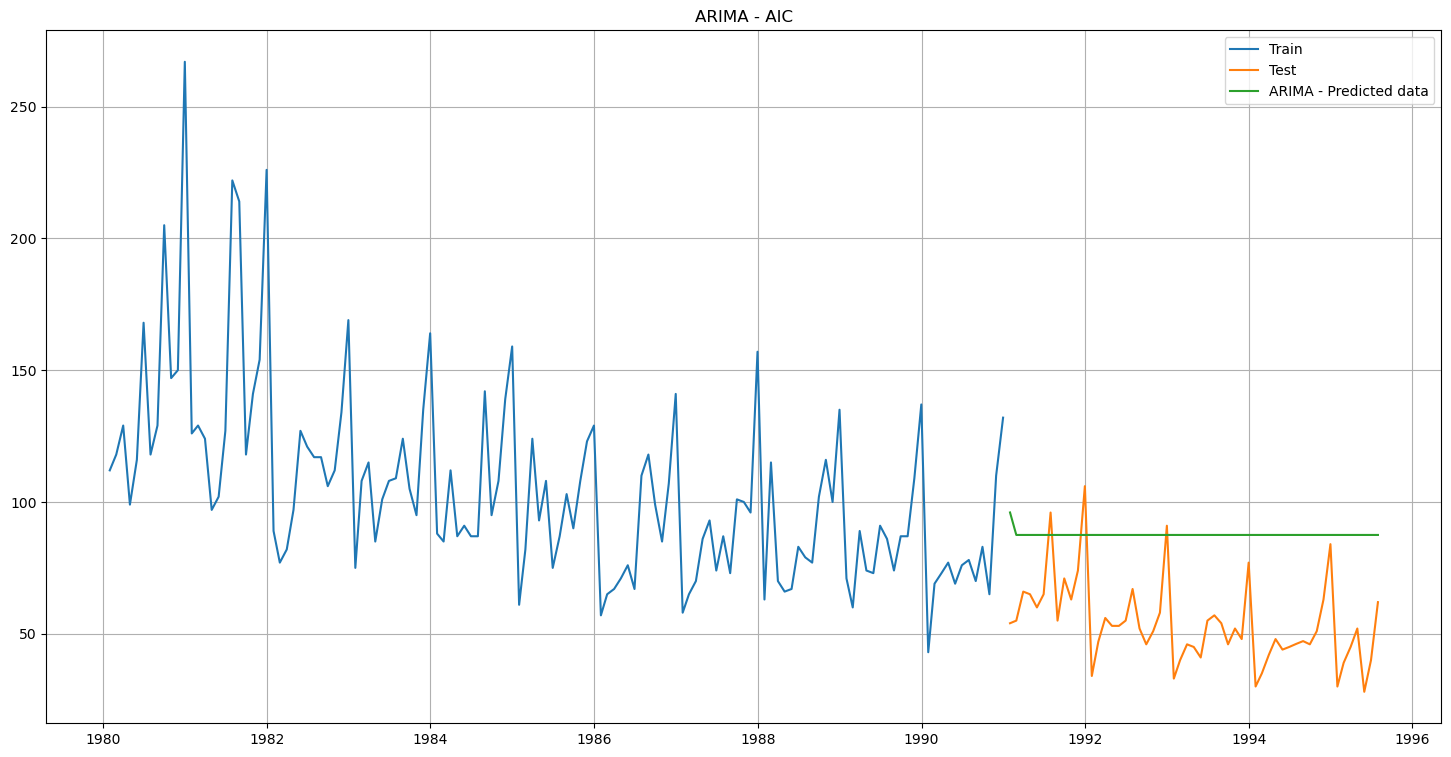

In [117]:
plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(test['Rose'].index, pred_ARIMA, label='ARIMA - Predicted data')

plt.title('ARIMA - AIC')
plt.legend(loc='best')
plt.grid();

## ARIMA model - ACF and PACF

In [118]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

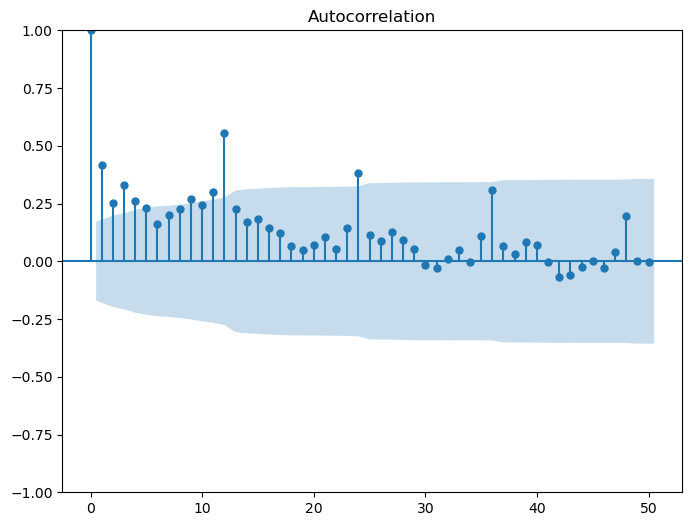

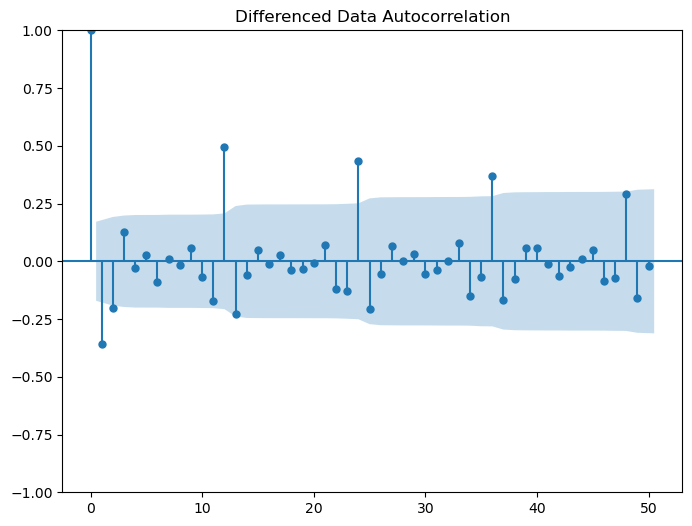

In [119]:
#ACF
plot_acf(train['Rose'],lags=50)
plot_acf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

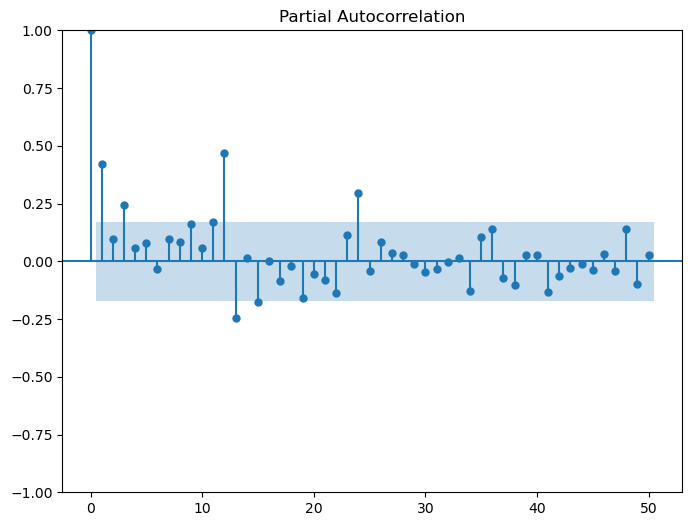

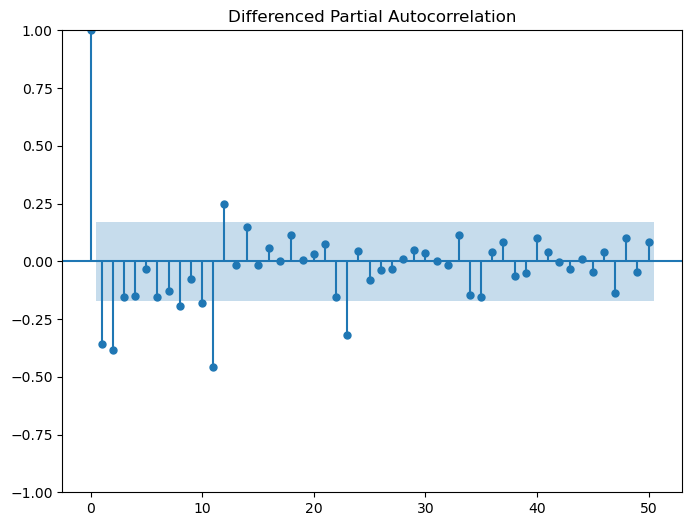

In [120]:
#PACF
plot_pacf(train['Rose'],lags=50)
plot_pacf(train['Rose'].diff().dropna(),lags=50,title='Differenced Partial Autocorrelation')
plt.show()

In [121]:
ARIMA_manual = ARIMA(train['Rose'], order=(2,1,2), freq='M')

results_manual_ARIMA = ARIMA_manual.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sat, 16 Dec 2023   AIC                           1281.871
Time:                        17:43:37   BIC                           1296.247
Sample:                    01-31-1980   HQIC                          1287.712
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


**Prediction on the test set**

In [122]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [123]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
print("RMSE is %4.2f" %rmse)

RMSE is 36.82


In [124]:
temp_resultsDf1 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA - ACF & PACF (2,1,2)'])
temp_resultsDf1

,Test RMSE
"ARIMA - ACF & PACF (2,1,2)",36.823178


In [125]:
results_final=pd.concat([results_final,temp_resultsDf1])
results_final

,Test RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238
SimpleAverageModel,53.413057
"Alpha=0.0987,SimpleExponentialSmoothing",36.748147
"Alpha=0.07,SimpleExponentialSmoothing (based on range)",36.386920
"Alpha=0.0000, Beta = 0.0000, DoubleExponentialSmoothing",15.255805
"Alpha=0.1, Beta=0.1,DoubleExponentialSmoothing (based on range)",36.829902
"Alpha=0.0439,Beta=2.2383,Gamma=0.0005,TripleExponentialSmoothing",16.624778
"Alpha=0.05,Beta=0.5,Gamma=0.0005,TripleExponentialSmoothing (based on range)",18.714411
"ARIMA - AIC (0,1,2)",37.258605


In [126]:
pred_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

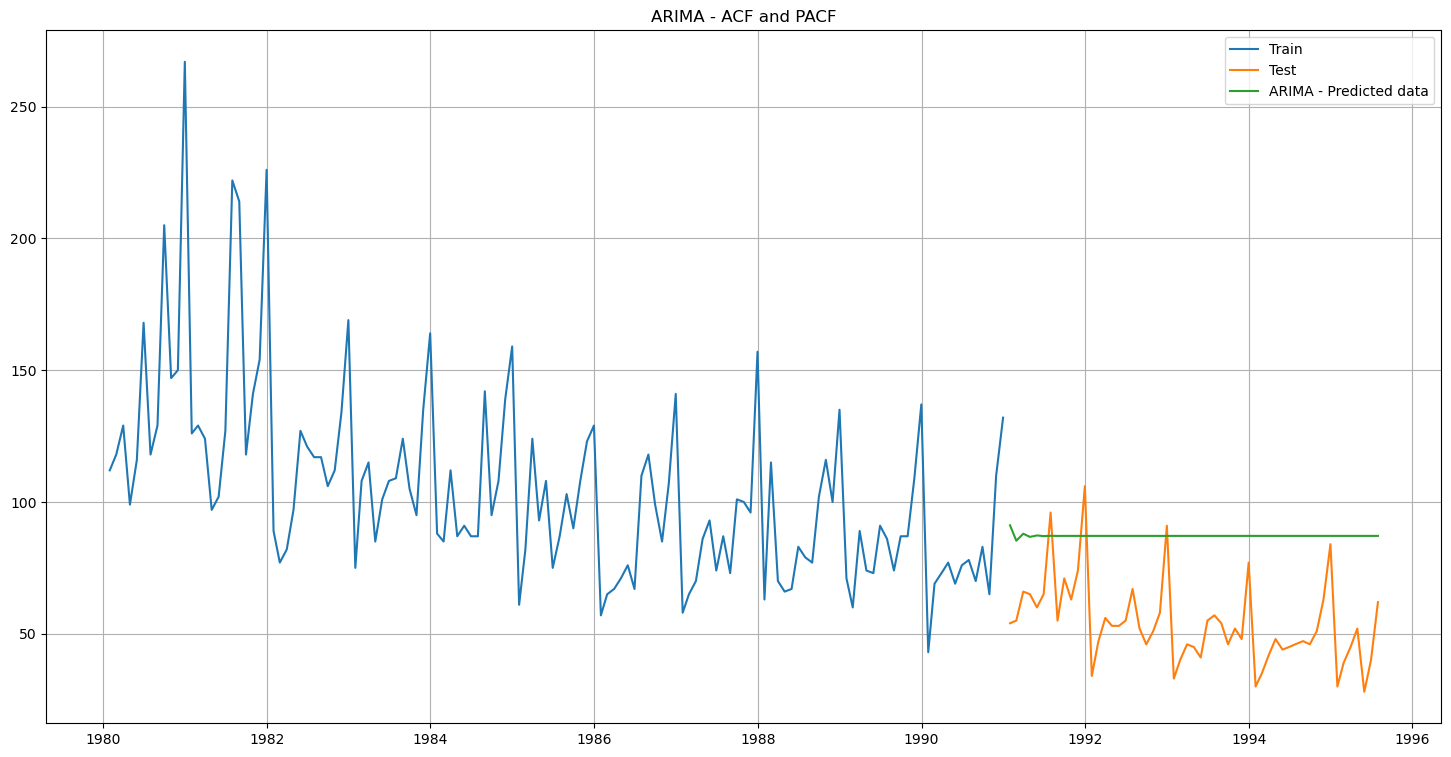

In [127]:
plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(test['Rose'].index, pred_ARIMA, label='ARIMA - Predicted data')

plt.title('ARIMA - ACF and PACF')
plt.legend(loc='best')
plt.grid();

## 2.7) Ans:

In [128]:
results_final

,Test RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238
SimpleAverageModel,53.413057
"Alpha=0.0987,SimpleExponentialSmoothing",36.748147
"Alpha=0.07,SimpleExponentialSmoothing (based on range)",36.386920
"Alpha=0.0000, Beta = 0.0000, DoubleExponentialSmoothing",15.255805
"Alpha=0.1, Beta=0.1,DoubleExponentialSmoothing (based on range)",36.829902
"Alpha=0.0439,Beta=2.2383,Gamma=0.0005,TripleExponentialSmoothing",16.624778
"Alpha=0.05,Beta=0.5,Gamma=0.0005,TripleExponentialSmoothing (based on range)",18.714411
"ARIMA - AIC (0,1,2)",37.258605


In [129]:
results_final.sort_values(by='Test RMSE')

,Test RMSE
RegressionOnTime,15.255435
"Alpha=0.0000, Beta = 0.0000, DoubleExponentialSmoothing",15.255805
"Alpha=0.0439,Beta=2.2383,Gamma=0.0005,TripleExponentialSmoothing",16.624778
"Alpha=0.05,Beta=0.5,Gamma=0.0005,TripleExponentialSmoothing (based on range)",18.714411
"Alpha=0.07,SimpleExponentialSmoothing (based on range)",36.386920
"Alpha=0.0987,SimpleExponentialSmoothing",36.748147
"ARIMA - ACF & PACF (2,1,2)",36.823178
"Alpha=0.1, Beta=0.1,DoubleExponentialSmoothing (based on range)",36.829902
"ARIMA - AIC (0,1,2)",37.258605
SimpleAverageModel,53.413057


## 2.8) Ans:

In [130]:
complete_data=ExponentialSmoothing(df1,trend='additive',seasonal='multiplicative',freq='M').fit(smoothing_level=0.0439, smoothing_trend=2.2383, smoothing_seasonal=0.0005)

In [131]:
complete_data_predict=complete_data.forecast(steps=12)

In [132]:
RMSE_complete_data = metrics.mean_squared_error(df1['Rose'],complete_data.fittedvalues,squared=False)

print('RMSE:',RMSE_complete_data)

RMSE: 18.48302727752114


In [133]:
# Getting the predictions on test data
prediction_1 = complete_data.forecast(steps=12)

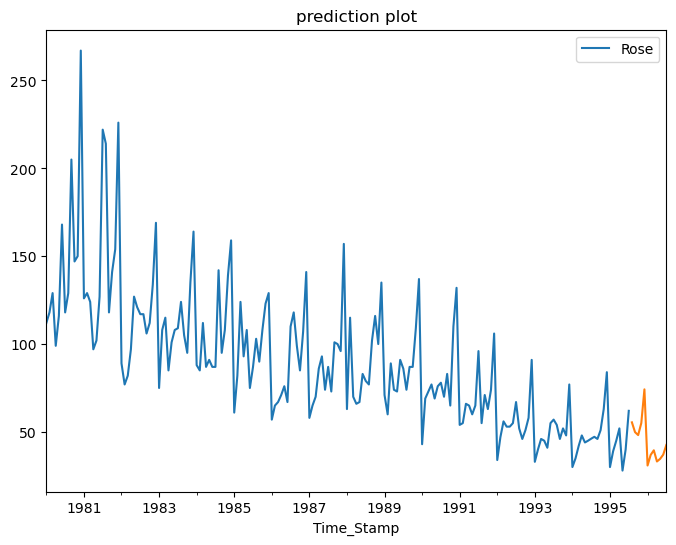

In [134]:
df1.plot()
plt.title('prediction plot')
prediction_1.plot();

In [135]:
# 95% confidence interval
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(complete_data.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(complete_data.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,19.124023,55.447078,91.770133
1995-09-30,13.549466,49.872521,86.195576
1995-10-31,11.877843,48.200898,84.523953
1995-11-30,18.716132,55.039187,91.362242
1995-12-31,37.898707,74.221762,110.544817


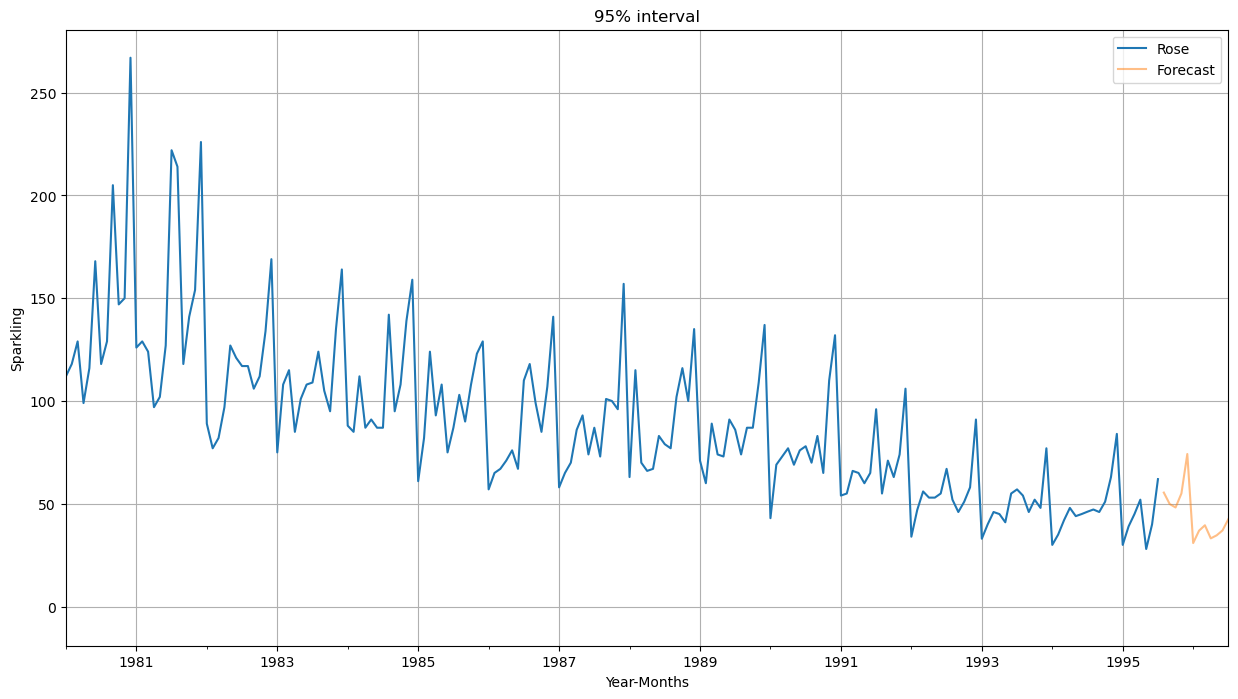

In [136]:
# Plot
axis = df1.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.title('95% interval')
plt.grid()
plt.show()

In [137]:
# 90% confidence interval
pred_2_df = pd.DataFrame({'lower_CI':prediction_1 - 1.64*np.std(complete_data.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.64*np.std(complete_data.resid,ddof=1)})
pred_2_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,25.054318,55.447078,85.839838
1995-09-30,19.479761,49.872521,80.265282
1995-10-31,17.808138,48.200898,78.593659
1995-11-30,24.646426,55.039187,85.431947
1995-12-31,43.829001,74.221762,104.614522


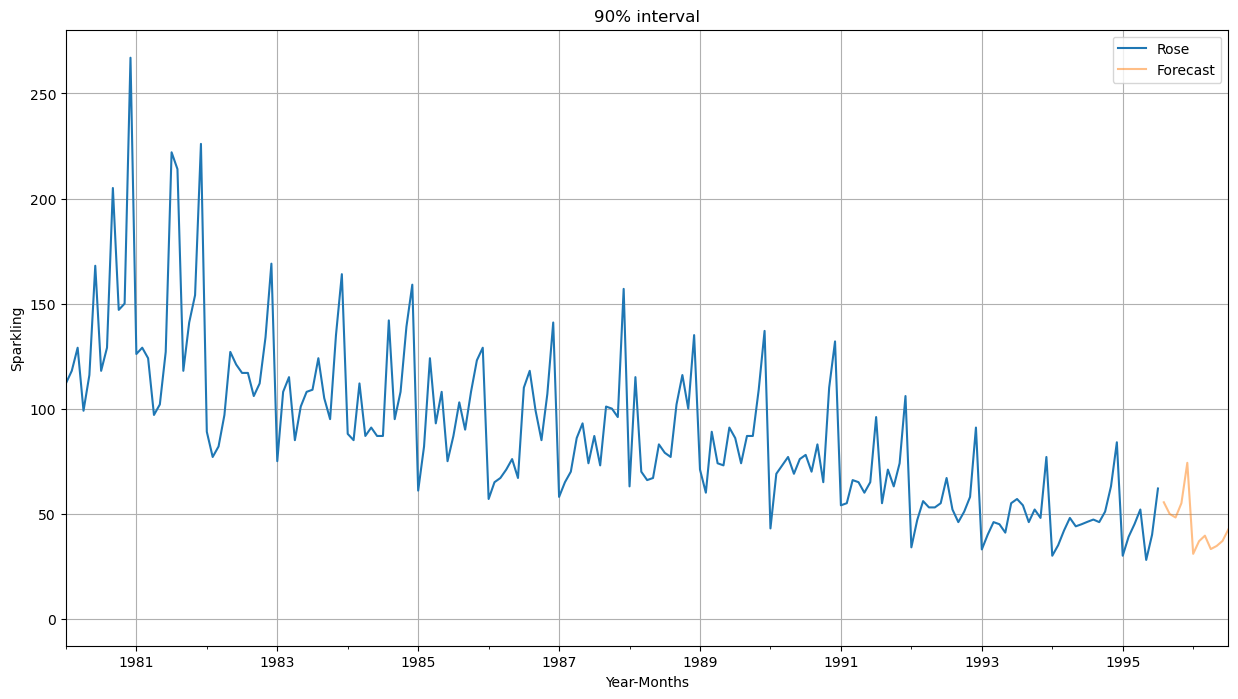

In [138]:
axis = df1.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.title('90% interval')
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


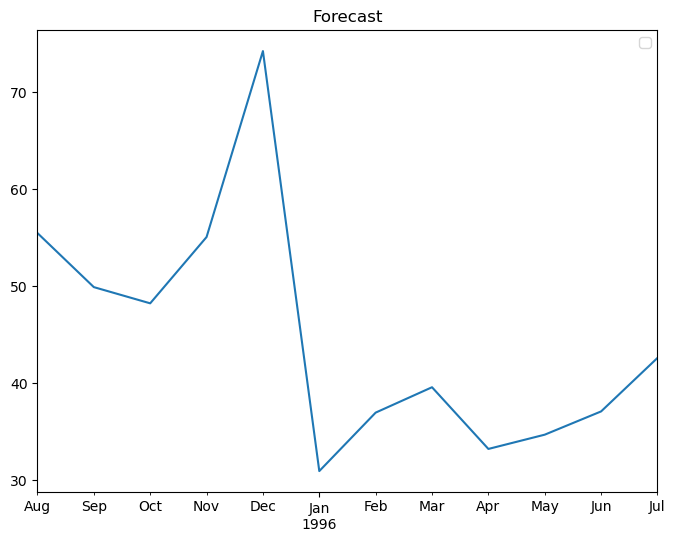

In [139]:
prediction_1.plot()
plt.title('Forecast')
plt.legend(loc='best');

## 1.9) Ans:

In [140]:
prediction_1

1995-08-31    55.447078
1995-09-30    49.872521
1995-10-31    48.200898
1995-11-30    55.039187
1995-12-31    74.221762
1996-01-31    30.896664
1996-02-29    36.927503
1996-03-31    39.545152
1996-04-30    33.180145
1996-05-31    34.652340
1996-06-30    37.051625
1996-07-31    42.569181
Freq: M, dtype: float64

In [141]:
prediction_1.describe()

count    12.000000
mean     44.800338
std      12.457346
min      30.896664
25%      36.358713
50%      41.057167
75%      51.164188
max      74.221762
dtype: float64